# Vizualization:
    - Heat mapa
    

## Important libraries

In [50]:
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import jaccard_score
from matplotlib.colors import ListedColormap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

#from scripts import visualization
import importlib as imp

# Import knihoven
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time
#imp.reload(visualization)

In [24]:
def nejcasteji_vyskytujici_scaffold(cesta_k_souboru, text):
    print(text)
    dff = pd.read_csv(cesta_k_souboru)
    dff = dff.sort_values(by=['count_of_occurance'], ascending=False)[['scaffold_test_tp','count_of_occurance']][:3]
    dff.insert(loc=1, column='image', value=0)
    PandasTools.AddMoleculeColumnToFrame(dff, 'scaffold_test_tp', 'image')
    display(dff)

In [12]:
def nejcasteji_vyskytujici_scaffold_in_whole_generated_set(number,path, text, type_cluster, generator):
    print(text)
    occur = {}
    result = pd.DataFrame(columns = ['scaffold','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'])

    df = pd.DataFrame()
    for x in range(number):
        occur[f'occur_{x}'] = f'{path}scaffolds_of_generated_moleculs_cluster_{x}_{type_cluster}_{generator}.csv'
        dff = pd.read_csv(occur[f'occur_{x}'], header=None)
        dff.columns = ['scaffold']
        dff['count'] = int(1)
        #display(dff)
        #df = pd.concat([df, dff], ignore_index=True)

        
        if x==0:
            cluster_0 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)
        elif x==1:
            cluster_1 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)
        elif x==2:
            cluster_2 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)
        elif x==3:
            cluster_3 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)
        elif x==4:
            cluster_4 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)

    uniq = list(set(cluster_0['scaffold']).intersection(set(cluster_1['scaffold']),set(cluster_2['scaffold']),set(cluster_3['scaffold']),set(cluster_4['scaffold'])))

    result['scaffold'] = uniq
    result['cluster_0'] = int(0)
    result['cluster_1'] = int(0)
    result['cluster_2'] = int(0)
    result['cluster_3'] = int(0)
    result['cluster_4'] = int(0)
    for x in range(len(uniq)):
        smile = uniq[x]

        count_0 = cluster_0[cluster_0['scaffold']==smile]['count']
        count_1 = cluster_1[cluster_1['scaffold']==smile]['count']
        count_2 = cluster_2[cluster_2['scaffold']==smile]['count']
        count_3 = cluster_3[cluster_3['scaffold']==smile]['count']
        count_4 = cluster_4[cluster_4['scaffold']==smile]['count']

        result.loc[x,'cluster_0'] = count_0.item()
        result.loc[x,'cluster_1'] = count_1.item()
        result.loc[x,'cluster_2'] = count_2.item()
        result.loc[x,'cluster_3'] = count_3.item()
        result.loc[x,'cluster_4'] = count_4.item()

    
    display(result.sort_values(by=['cluster_0'], ascending=False))
    display(result.sort_values(by=['cluster_1'], ascending=False))
    display(result.sort_values(by=['cluster_2'], ascending=False))
    display(result.sort_values(by=['cluster_3'], ascending=False))
    display(result.sort_values(by=['cluster_4'], ascending=False))

    result.to_csv("data/results/result_count_occurance_all-generated_clusters_dis_Molpher.csv", index=False)
    #        if dff[0][y] in set(result['scaffold']):
    #            print("IF")
    #            print("PRINT",result[result['scaffold'] == [dff[0][y]]])
    #            result[result['scaffold'] == [dff[0][y]]]['count'][0] += 1
    #            
    #        else:
    #            print("ELSE")
    #            result.loc[len(result)] = [dff[0][y],1]
    #            display(result)
#
    #print("KONEC")
    #print(result_dict)
    #dff.insert(loc=1, column='image', value=0)
    #PandasTools.AddMoleculeColumnToFrame(dff, 'scaffold_test_tp', 'image')
    #display(dff)


In [13]:
nejcasteji_vyskytujici_scaffold_in_whole_generated_set(5,"data/results/csk_scaffolds/dis/Molpher/", "Molpher generator Glucocorticoidni receptor dis", 'dis', "Molpher")

Molpher generator Glucocorticoidni receptor dis


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,13266,13028,10916,8522,2243
1873,C1CCCCC1,7111,6541,4365,6053,1536
1341,C1CCC(C2CCC3CCCCC32)CC1,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,5868,6418,5684,4292,465
...,...,...,...,...,...,...
2141,C(CCCCCCCC1CCCC2CCCCC12)CCCCCCC1CCCCC1,1,3,5,17,2
2764,C1CCC(CCC2CCCCCC2C2CCC3C(CCC3C3CCCCC3)C2)CC1,1,57,1,1,2
6004,C1CCC(CC(C2CCCCC2)C2CCCC(CCC3CCCC3)C2)CC1,1,9,11,12,13
2755,C1CCC(C2C(CC3CCCC4CCCCC43)CC3CCCCC32)CC1,1,16,28,9,8


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,13266,13028,10916,8522,2243
1341,C1CCC(C2CCC3CCCCC32)CC1,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,6430,7123,6595,5655,676
3588,C1CCC(C2CCC3CCCCC3C2)CC1,5504,6694,5678,1454,3473
1873,C1CCCCC1,7111,6541,4365,6053,1536
...,...,...,...,...,...,...
6071,C(CCCC1CCCCC1)CCCC1CCC(CC2CCC2)C1,2,1,4,3,1
3470,C1CCC(C2CCC3CCC(C4CCCC4)C32)CC1,2,1,4,1,2
57,C1CCC(CCC2C(C3CCCCC3)CCC2C2CCCC2)CC1,16,1,27,1,4
4781,C1CCC(CC(CCCC2CCC(C3CCC4CCCCC43)CC2)C2CCCCC2)CC1,217,1,69,152,24


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,13266,13028,10916,8522,2243
625,C1CCC(CCCCC2CCCCC2)CC1,6430,7123,6595,5655,676
1341,C1CCC(C2CCC3CCCCC32)CC1,6625,7788,6247,1882,2460
6370,C1CCC(CCCCCC2CCCCC2)CC1,5868,6418,5684,4292,465
3588,C1CCC(C2CCC3CCCCC3C2)CC1,5504,6694,5678,1454,3473
...,...,...,...,...,...,...
6516,C1CCC(C2CCC(CC3CCC3C3CCCCC3)CC2)CC1,49,15,1,2,4
6240,C1CCC(CCCCC2CCC2C2CCCC3CCCCC32)CC1,15,11,1,10,5
828,C1CCC(CCC2CCC3C(CCC4CCC(C5CCC5)CCC43)C2)CC1,6,11,1,1,6
610,C1CCC(C2CCCCCC2CC2CCC3CCCCC32)CC1,20,7,1,14,7


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,13266,13028,10916,8522,2243
1873,C1CCCCC1,7111,6541,4365,6053,1536
625,C1CCC(CCCCC2CCCCC2)CC1,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,5868,6418,5684,4292,465
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,49,4927,3363,3151,2377
...,...,...,...,...,...,...
5475,C1CCCC(CCCC2CCC3C(CCC3C3CCCCC3)C2)CC1,15,4,10,1,6
3513,C1CCC(CCC2CCC(C3CCC(C4CCCC4)C3)CC2)CC1,6,25,5,1,9
5471,C1CCC(CCCCC2CCCC(CC3CCC4CCCC4C3)C2)CC1,8,8,6,1,5
3531,C1CCC2CC(C3CCCCC3C3CC4CCCCC43)CCC2C1,1,1,5,1,7


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
3588,C1CCC(C2CCC3CCCCC3C2)CC1,5504,6694,5678,1454,3473
2180,C1CCC(CCC2CCC3C(CCC3C3CCCCC3)C2)CC1,5708,4615,5519,1075,3109
6040,C1CCC(CCC(CC2CCC3CCCC3C2)C2CCCCC2)CC1,2216,31,2168,2300,2467
1341,C1CCC(C2CCC3CCCCC32)CC1,6625,7788,6247,1882,2460
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,49,4927,3363,3151,2377
...,...,...,...,...,...,...
3137,C1CCC(CCCCC2CCCC(C3CCC(CCC4CCCC4)CC3)C2)CC1,3,1,10,6,1
1499,C1CCC2C(C1)CC1C3CCCC3CCC21,7,7,2,6,1
3134,C1CCC(CCC2CC2C2CCCC3CCCCC32)CC1,8,7,14,4,1
3124,C1CCC(CCC(C2CCCC2)C2CC2)CC1,19,9,8,3,1


In [11]:
df = pd.read_csv("data/results/result_count_occurance_all-generated_clusters_dis_Molpher.csv")
df

,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,C1CCCC(C2CCCC(CCCCC3CCCCC3)C2)CCC1,126,110,83,62,34
1,C1CCC(CCCCC2CCC3C(CC4CCCCC4)CCCC3C2)CC1,11,8,22,21,15
2,C1CCC(CCCC2CCC3C(CCCCC4CCCCC43)C2)C1,5,4,17,4,1
3,C1CCC(C2CCCC(C3CCCC4CCCCC4CC3)C2)CC1,20,10,2,16,8
4,C1CCC(CC2CCCCC2CC2CC2)CC1,180,252,184,134,2
...,...,...,...,...,...,...
6835,C1CCC(CCC2CCCC(C3CCCCC3)C3CCCC3C2)CC1,2,3,1,3,3
6836,C1CCC(C(CCCC2CCCC2)CC2CCC(CC3CCCC3)CC2)CC1,2,1,1,3,1
6837,C1CCC(CCCCC2CCCCC2C2CCC3CCCCC3C2)CC1,58,39,43,4,24
6838,C1CCC(CC2CCC3C(CCCC3C3CCCCC3)C2)CC1,44,70,21,12,13


EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1873,C1CCCCC1,,7111,6541,4365,6053,1536
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465

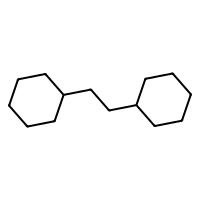
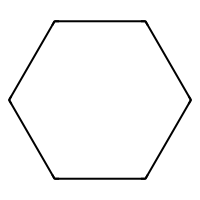
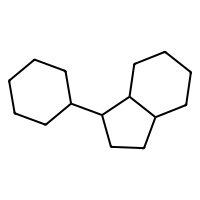
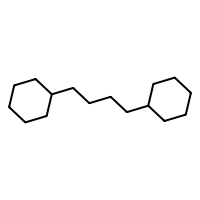
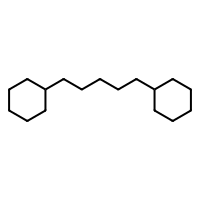

[1003/165442.475072:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165442.525167:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165442.529167:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
66393 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_0.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1873,C1CCCCC1,,7111,6541,4365,6053,1536
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465

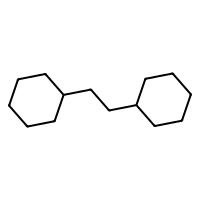
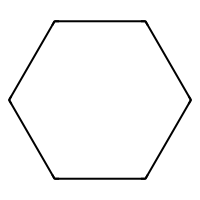
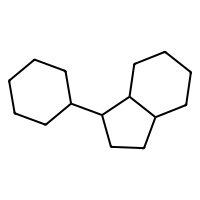
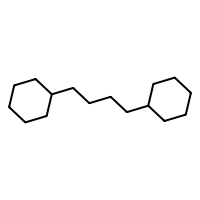
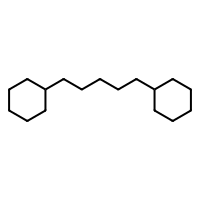

EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473
1873,C1CCCCC1,,7111,6541,4365,6053,1536

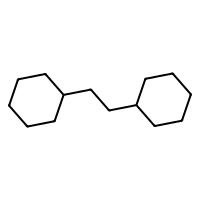
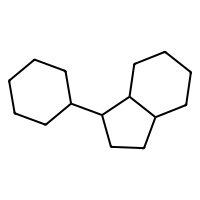
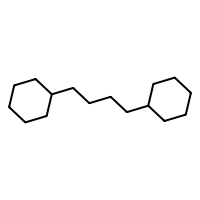
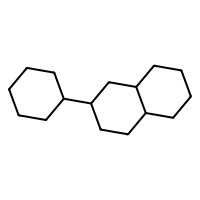
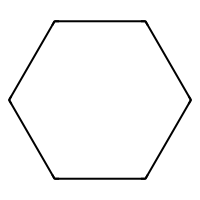

[1003/165442.772485:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165442.834064:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165442.838204:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
69412 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_1.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473
1873,C1CCCCC1,,7111,6541,4365,6053,1536

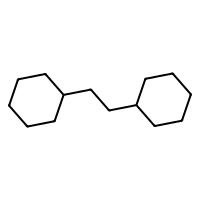
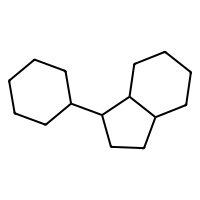
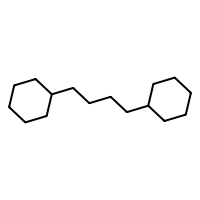
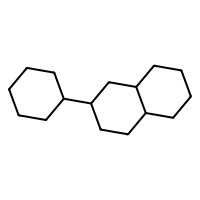
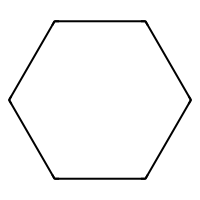

EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473

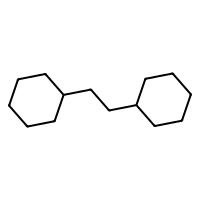
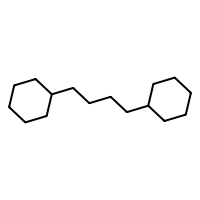
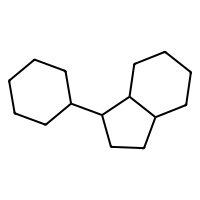
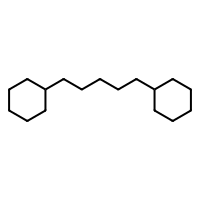
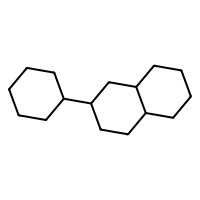

[1003/165443.060457:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165443.125524:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165443.129144:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
67885 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_2.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473

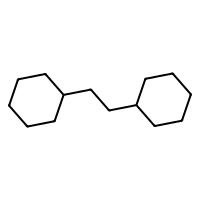
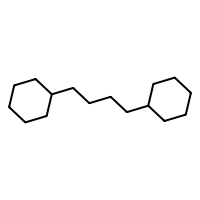
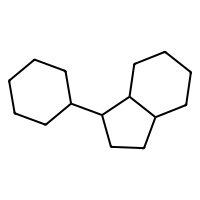
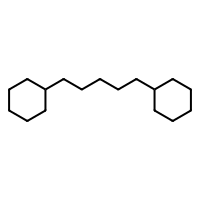
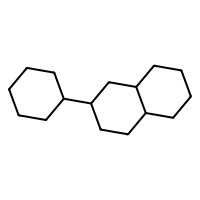

EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1873,C1CCCCC1,,7111,6541,4365,6053,1536
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,,49,4927,3363,3151,2377

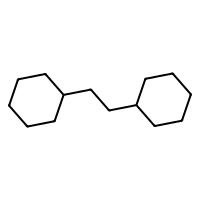
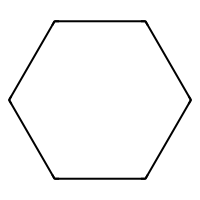
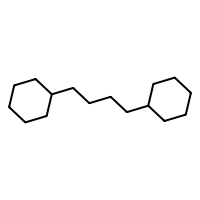
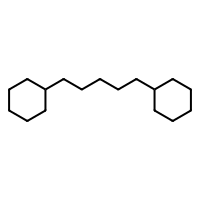
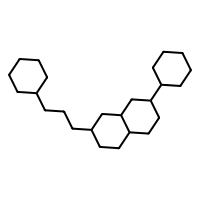

[1003/165443.465536:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165443.579430:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165443.582695:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
65639 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_3.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1873,C1CCCCC1,,7111,6541,4365,6053,1536
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,,49,4927,3363,3151,2377

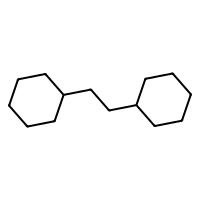
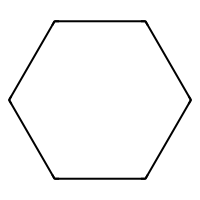
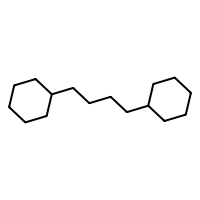
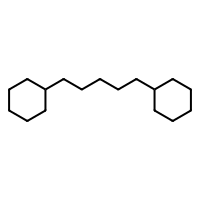
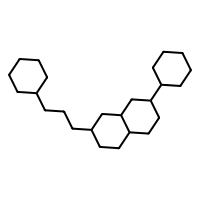

EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473
2180,C1CCC(CCC2CCC3C(CCC3C3CCCCC3)C2)CC1,,5708,4615,5519,1075,3109
6040,C1CCC(CCC(CC2CCC3CCCC3C2)C2CCCCC2)CC1,,2216,31,2168,2300,2467
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,,49,4927,3363,3151,2377

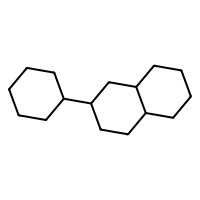
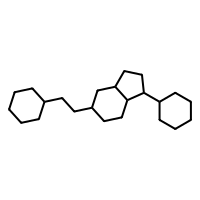
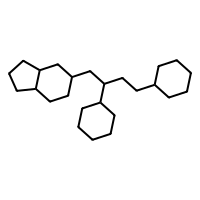
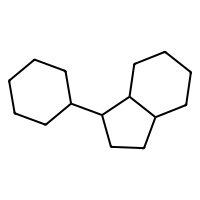
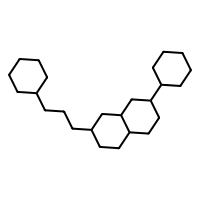

[1003/165443.816999:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165443.865245:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165443.868969:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
73715 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_4.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473
2180,C1CCC(CCC2CCC3C(CCC3C3CCCCC3)C2)CC1,,5708,4615,5519,1075,3109
6040,C1CCC(CCC(CC2CCC3CCCC3C2)C2CCCCC2)CC1,,2216,31,2168,2300,2467
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,,49,4927,3363,3151,2377

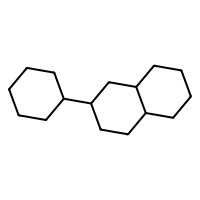
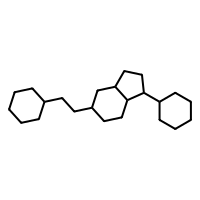
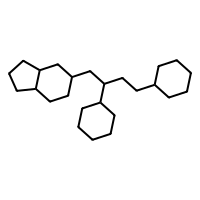
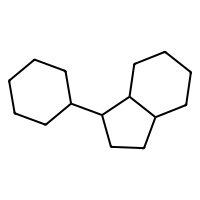
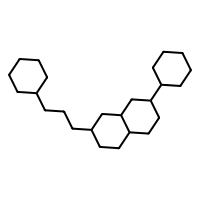

In [33]:
receptor = 'Glucocorticoid_receptor'
type_cluster = 'dis'
scaffold = 'csk'
generator = 'Molpher'
for x in range(5):
    df1 = df.sort_values(by=[f'cluster_{x}'], ascending=False)[:5]
    df1.insert(loc=1, column='image', value=0)
    PandasTools.AddMoleculeColumnToFrame(df1, 'scaffold', 'image')
    #df1 = df1.drop(['scaffold'], axis=1)
    path_to_save = f'img/the_most_common_scaffolds/{receptor}/{type_cluster}/{scaffold}/{generator}/'
    name = f'the_most_common_within_every_clusters_{x}.png'
    ExportReport(df1,path_to_save, name, 1000,1200)
    display(df1)
    

In [38]:
nejcasteji_vyskytujici_scaffold("data/results/csk_scaffolds/dis/Molpher/count_of_occurance_cluster_0_dis_Molpher.csv", "Molpher generator cluster 0 Glucocorticoidni receptor dis")

Molpher generator cluster 0 Glucocorticoidni receptor dis


NameError: name 'cesta_k_souboru' is not defined

Molpher generator cluster 1 Glucocorticoidni receptor dis


,scaffold_test_tp,image,count_of_occurance,uniq_occurance
19,C1CCC(CCC2CCC3C(CCC3C3CCCC(CCC4CCCC4)C3)C2)CC1,,566,1
2,C1CCC(CC(CC2CCCCC2)C2CCCCC2)CC1,,357,1
0,C1CCC(CCCCCC2CCC3C(CCC3C3CCCCC3)C2)CC1,,250,1

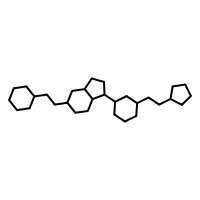
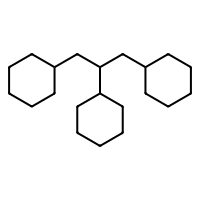
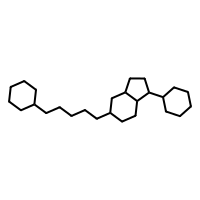

In [91]:
nejcasteji_vyskytujici_scaffold("data/results/csk_scaffolds/count_of_occurance_cluster_1_dis_Molpher.csv", "Molpher generator cluster 1 Glucocorticoidni receptor dis")

Molpher generator cluster 2 Glucocorticoidni receptor dis


,scaffold_test_tp,image,count_of_occurance,uniq_occurance
7,C1CCC(C2CC3CCCCC3C3CCCCC23)CC1,,202,1
31,C1CCC(CC2CC3CCCCC3C2C2CCCCC2)CC1,,20,1
27,C1CCC(CC2CCCC(C3CC4CCCCC4C4CCCCC34)C2)CC1,,19,1

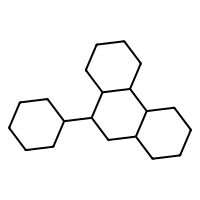
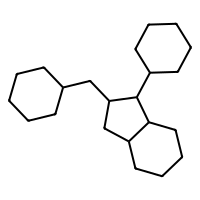
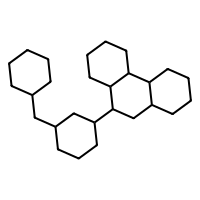

In [92]:
nejcasteji_vyskytujici_scaffold("data/results/csk_scaffolds/count_of_occurance_cluster_2_dis_Molpher.csv", "Molpher generator cluster 2 Glucocorticoidni receptor dis")

Molpher generator cluster 3 Glucocorticoidni receptor dis


,scaffold_test_tp,image,count_of_occurance,uniq_occurance
9,C1CCC(C2CCC3CCCCC32)CC1,,1882,1
1,C1CCC(C2CCC3CCCCC3C2)CC1,,1454,1
5,C1CCC(CCC2CCC3C(CCC3C3CCCCC3)C2)CC1,,1075,1

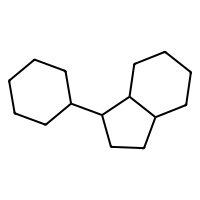
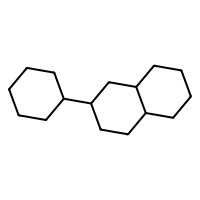
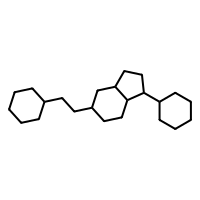

In [94]:
nejcasteji_vyskytujici_scaffold("data/results/csk_scaffolds/count_of_occurance_cluster_3_dis_Molpher.csv", "Molpher generator cluster 3 Glucocorticoidni receptor dis")

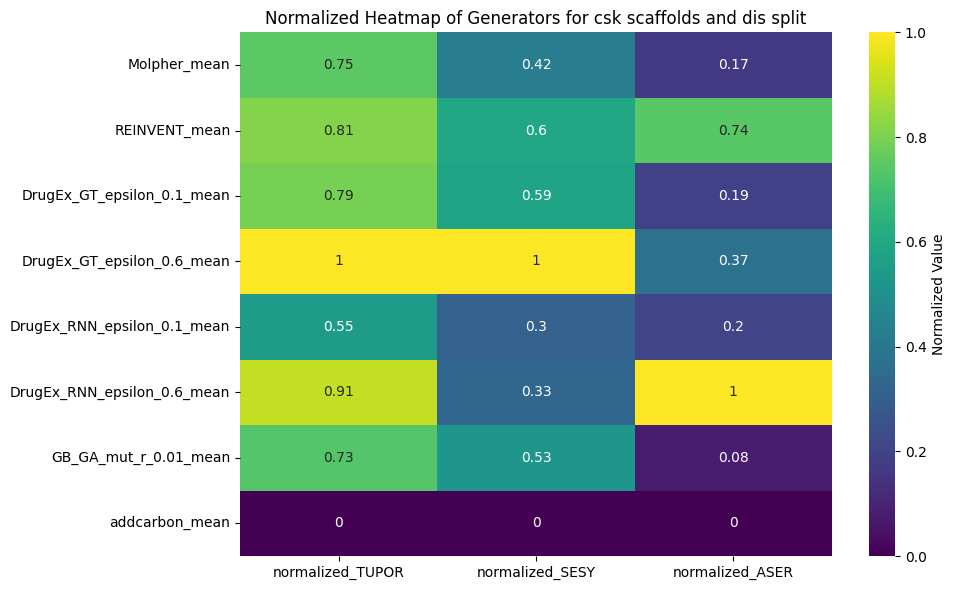

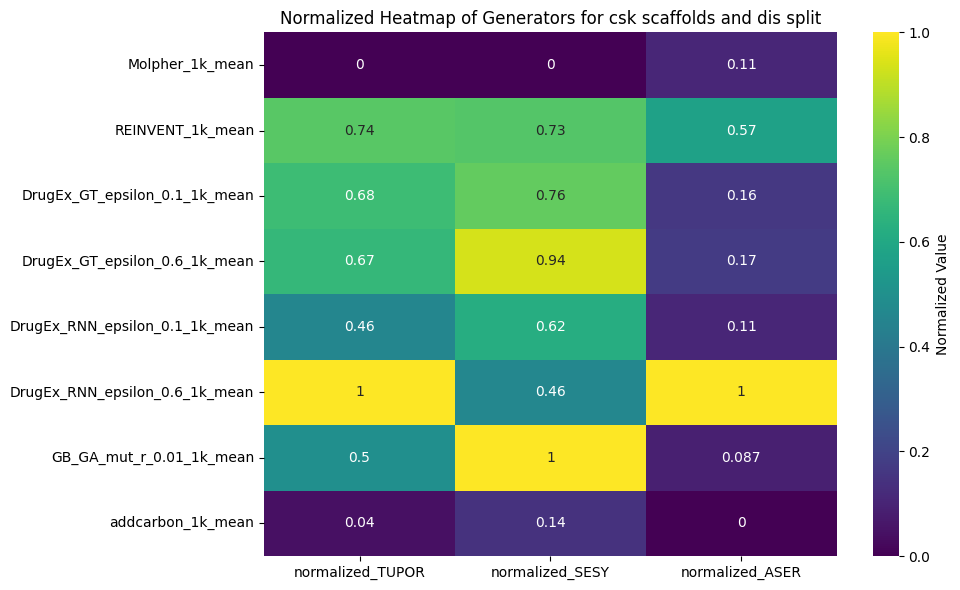

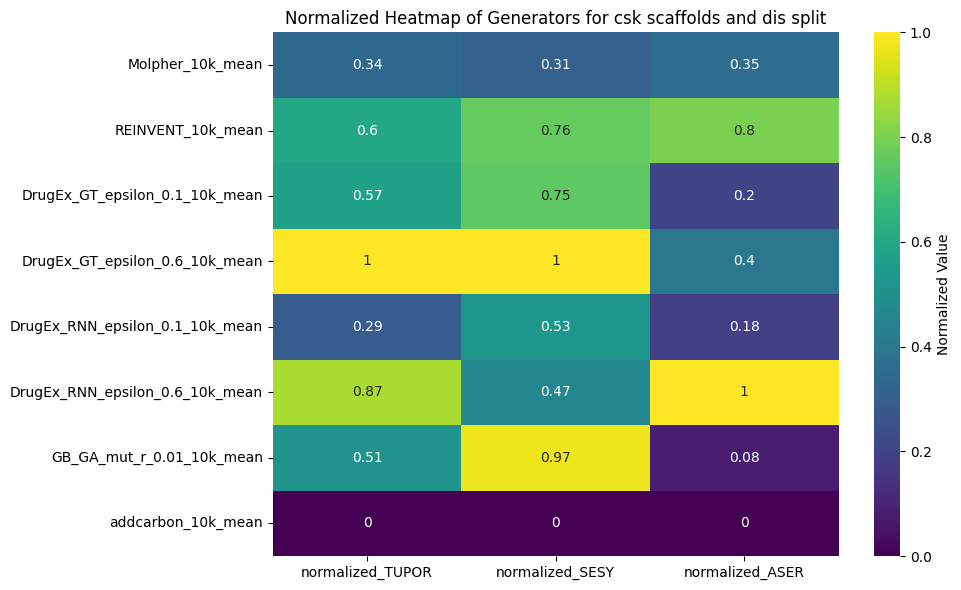

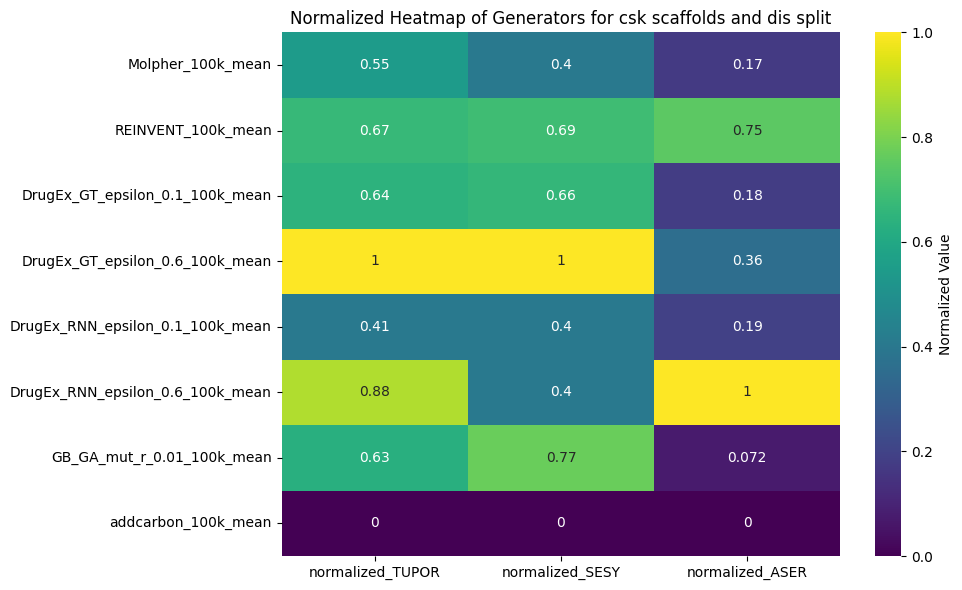

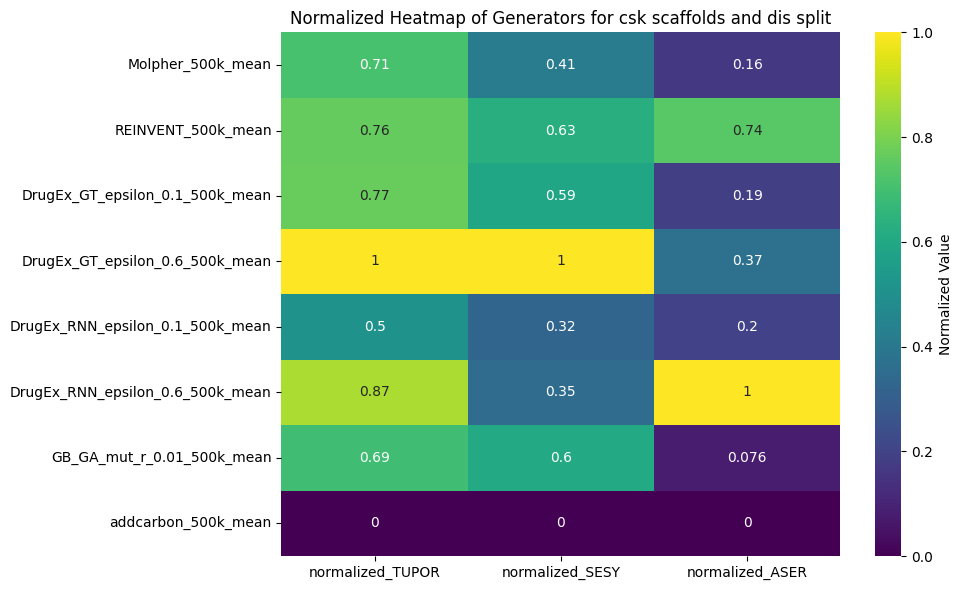

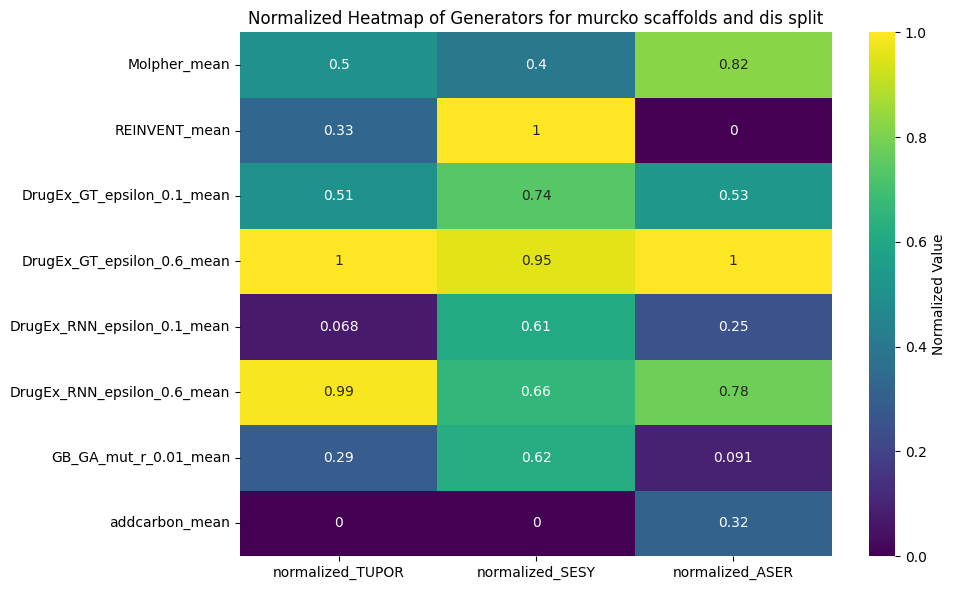

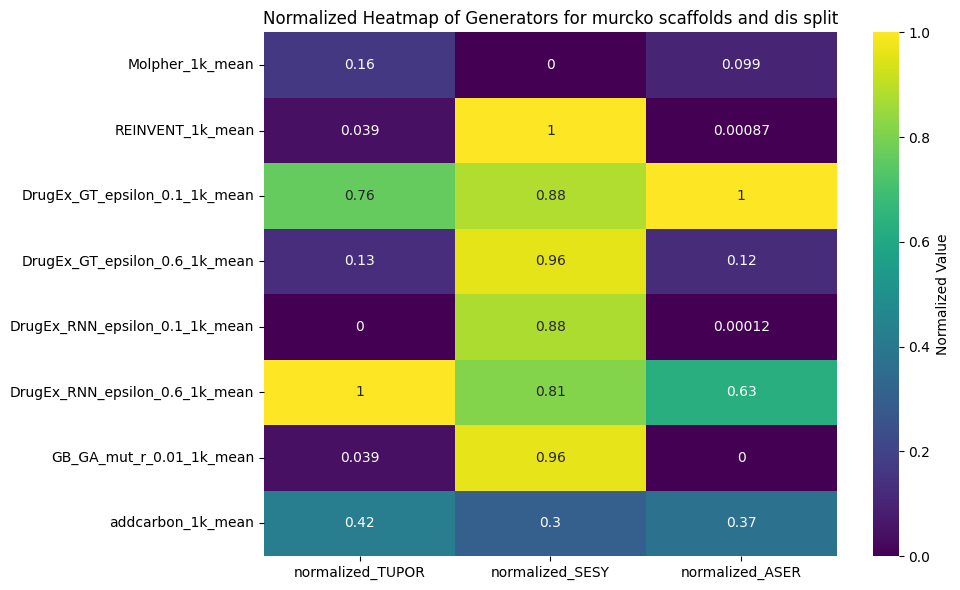

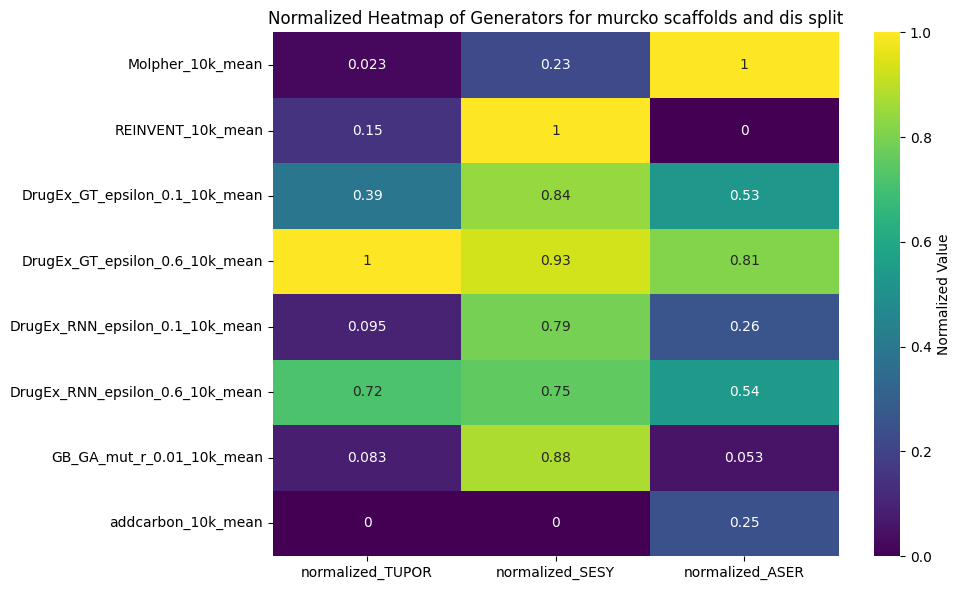

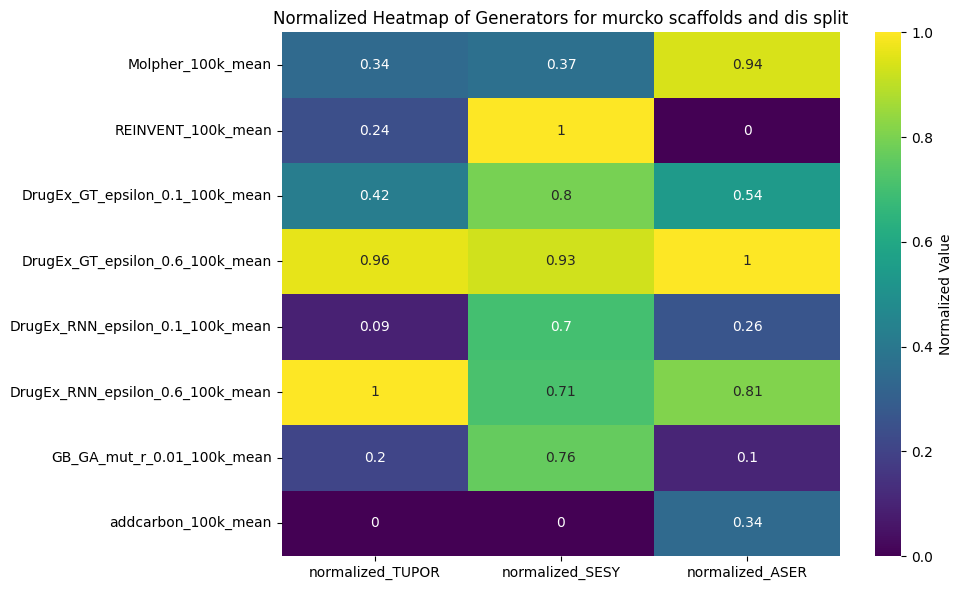

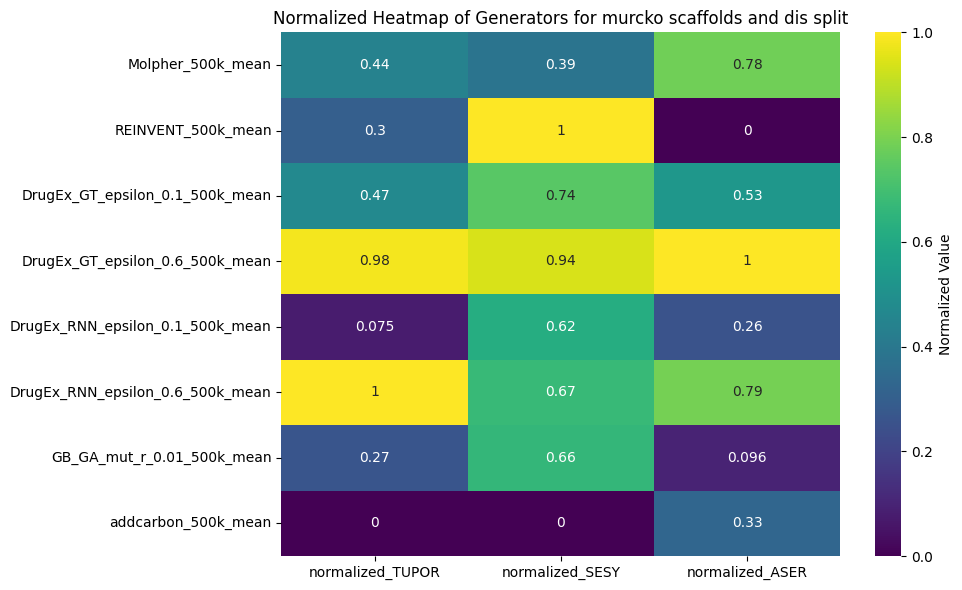

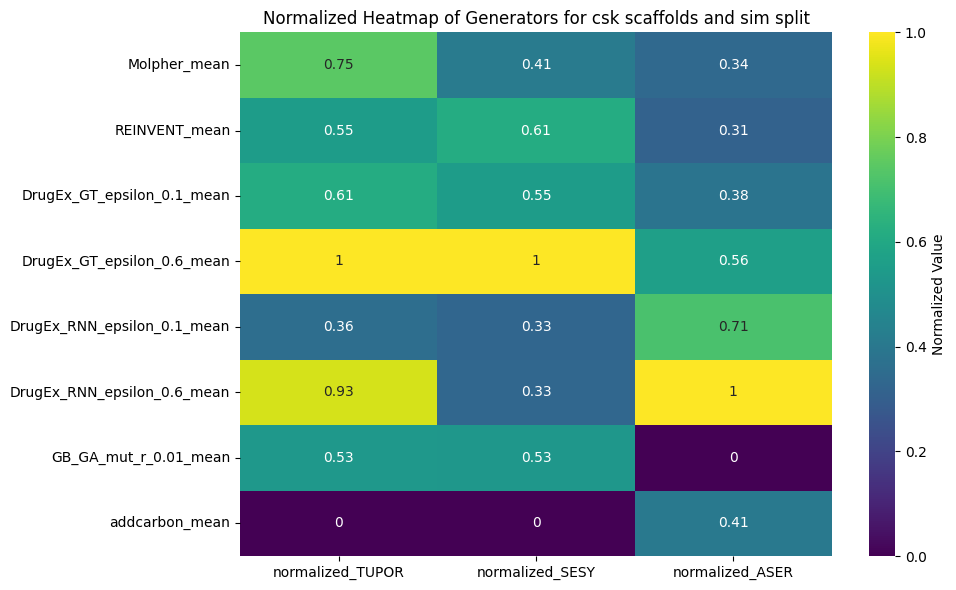

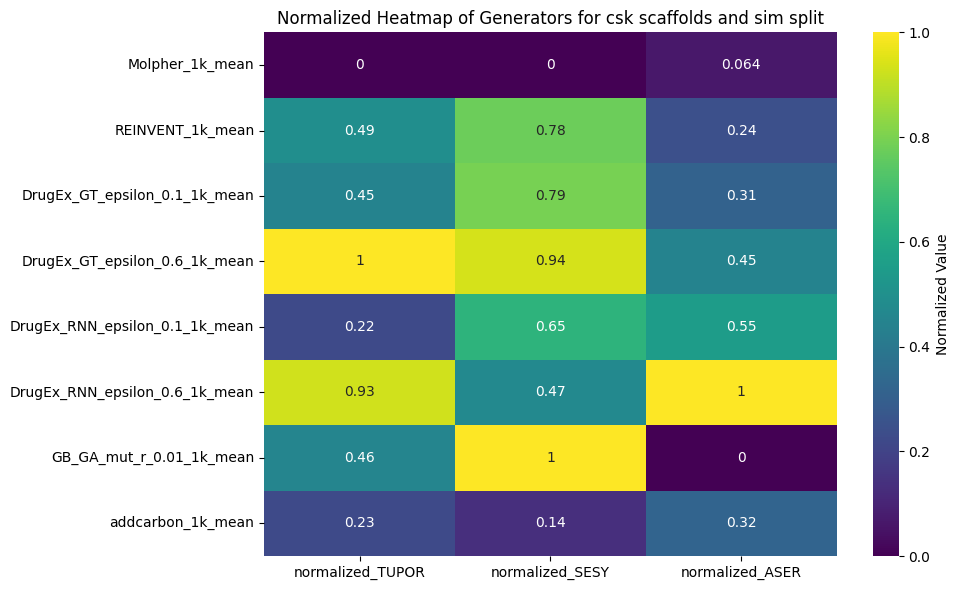

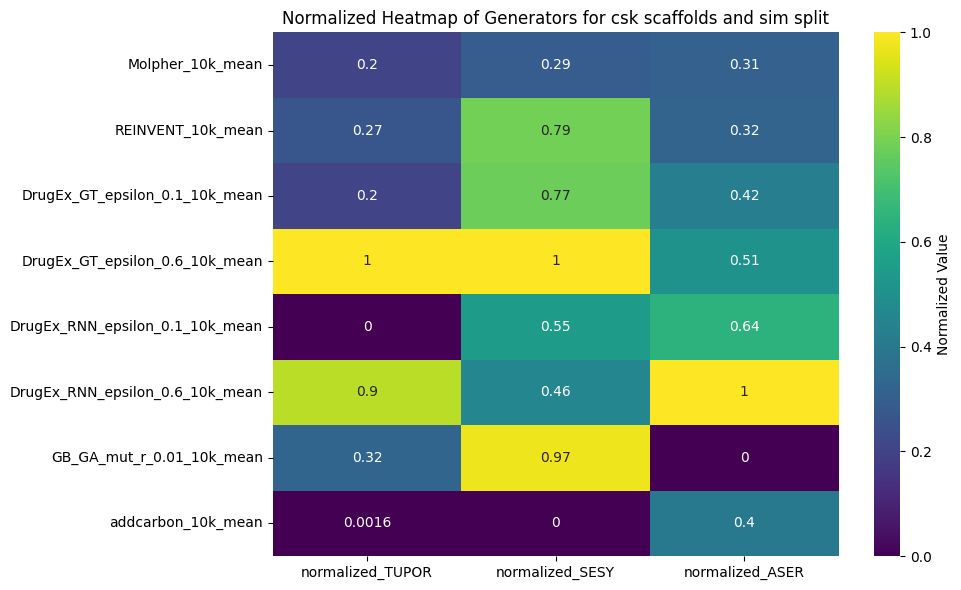

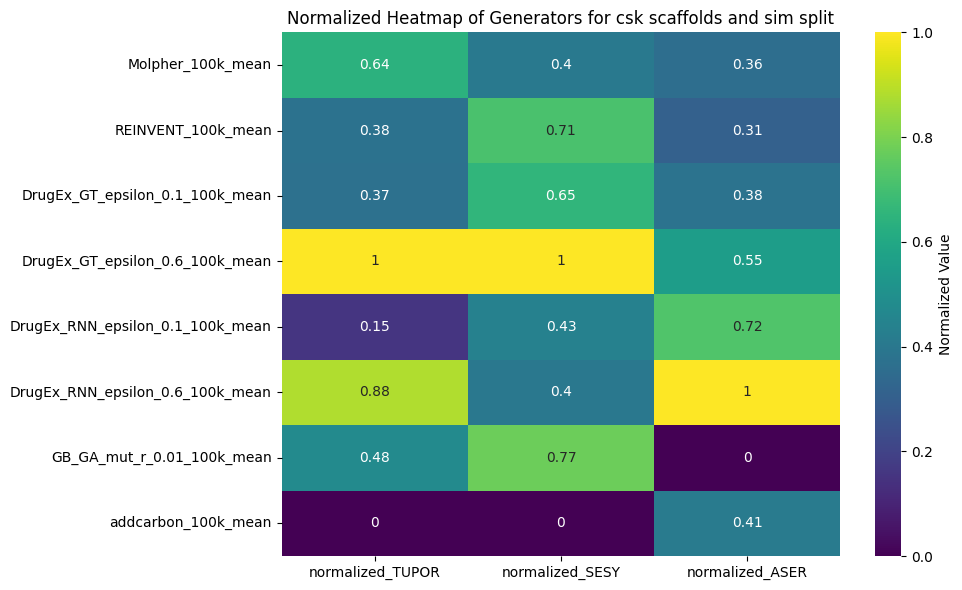

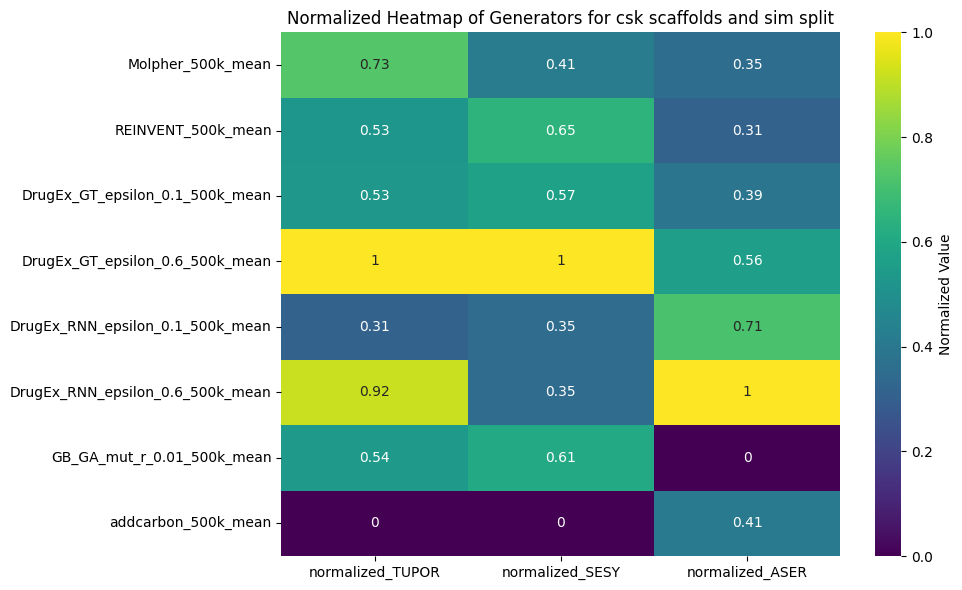

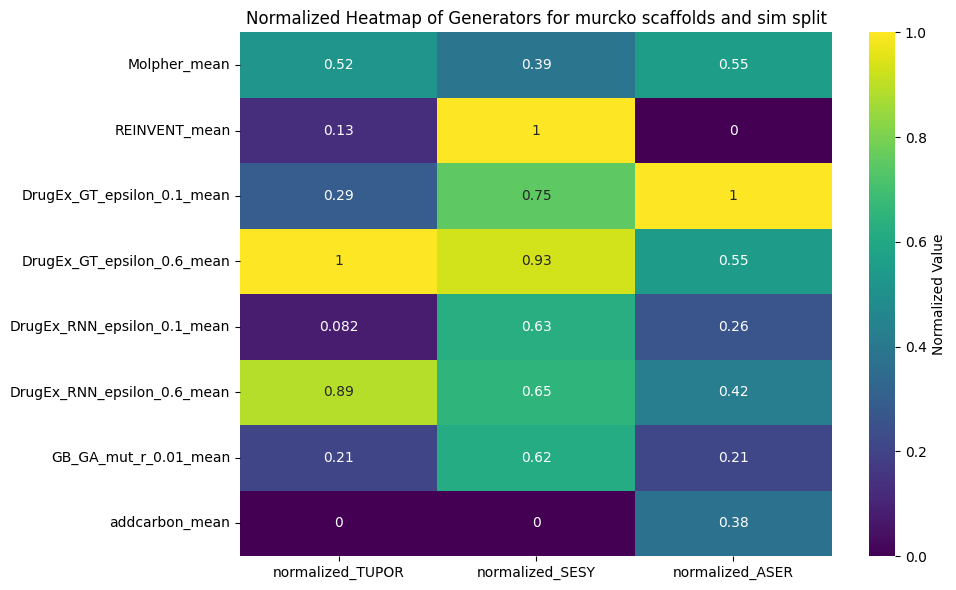

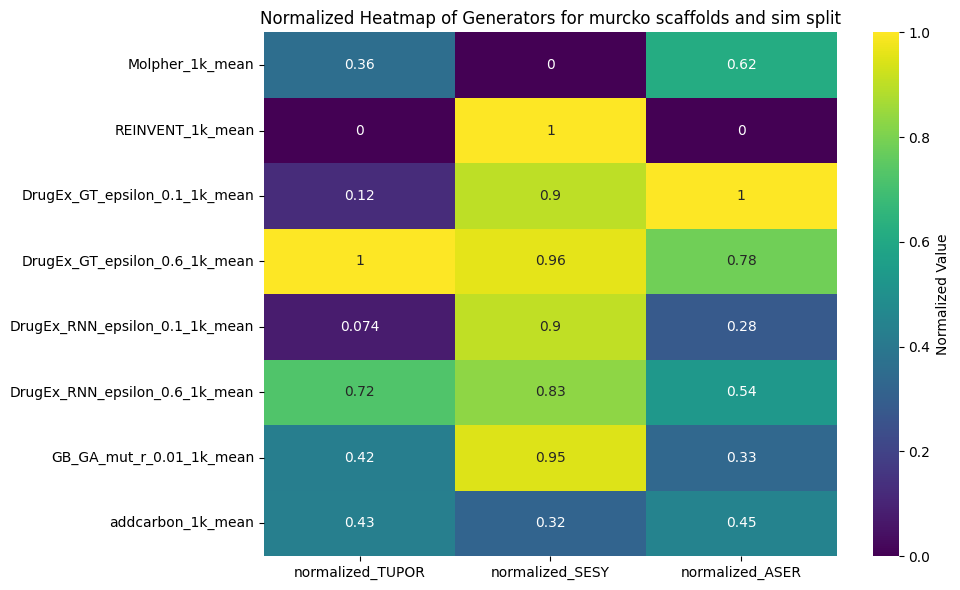

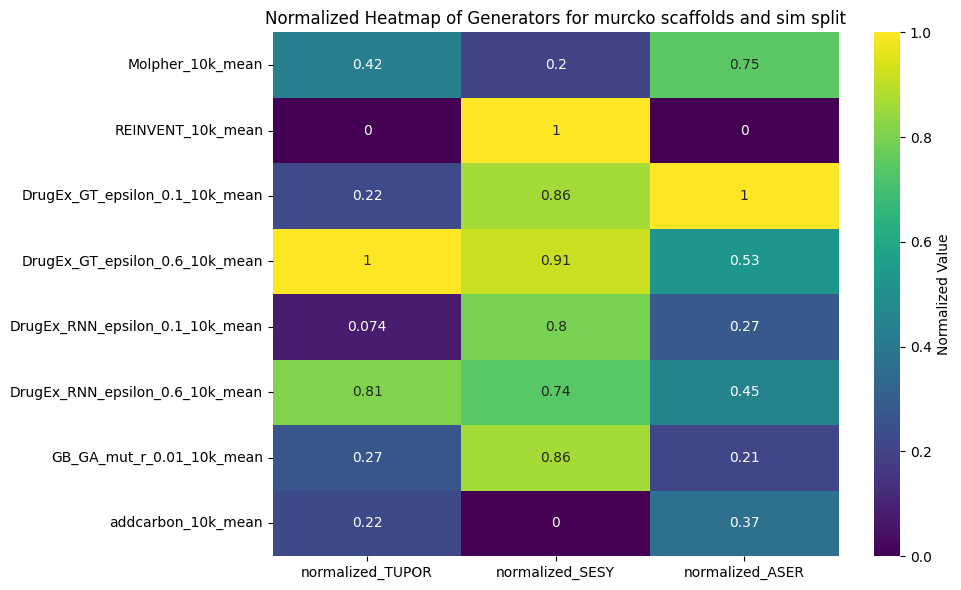

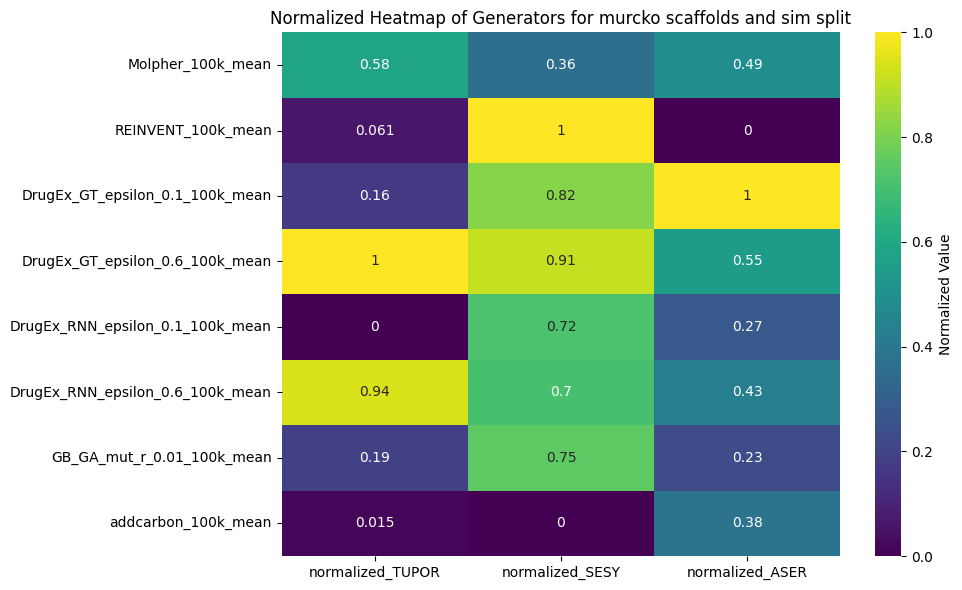

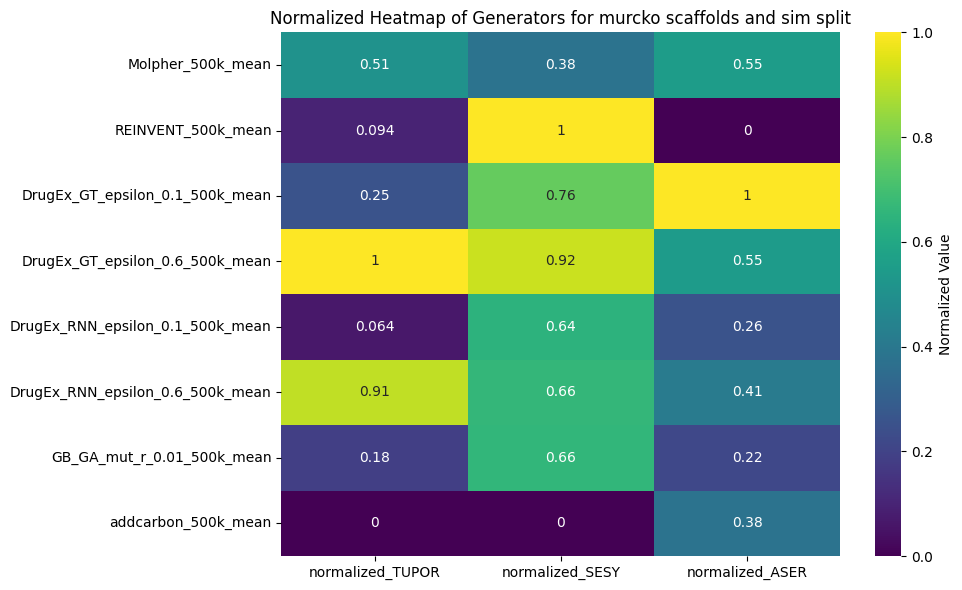

In [58]:
for type_split in ['dis','sim']:
    for scaf in ['csk', 'murcko']:
        for _ in ['','_1k', '_10k', '_100k', '_500k']:
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{_}.csv")
    
            df['normalized_TUPOR'] =  df['TUPOR'].apply(lambda x: (x - df['TUPOR'].min()) / (df['TUPOR'].max() - df['TUPOR'].min()))
            df['normalized_SESY'] =  df['SESY'].apply(lambda x: (x - df['SESY'].min()) / (df['SESY'].max() - df['SESY'].min()))
            df['normalized_ASER'] =  df['ASER'].apply(lambda x: (x - df['ASER'].min()) / (df['ASER'].max() - df['ASER'].min()))
            
            normalized_df = df[[ 'normalized_TUPOR', 'normalized_SESY', 'normalized_ASER']]
            normalized_df.index = df.name.tolist()
            
            
            plt.figure(figsize=(10, 6))
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'})
            plt.title(f'Normalized Heatmap of Generators for {scaf} scaffolds and {type_split} split')
    
            plt.tight_layout()
            plt.savefig(f'img/heat_mapa/heat_mapa_{type_split}_{scaf}_{_}.png')
            plt.show()
    